In [ ]:
!pip install ucimlrepo
!pip install category_encoders

# Лабораторная работа 4.

## Задача восстановления зависимостей. Манипулирование признаками. Сокращение размерности.

### 1. Выбрать подходящую таблицу данных (должна содержать числовые и категориальные переменные). Временно убрать категориальные признаки. Построить линейную регрессию.

### 2. Построить решение методом бустинга. Сравнить с линейной регрессией.

### 3. Применить one hot и target encoding для категориальных признаков (взять данные, где такие признаки есть). Сравнить точность.

### 4. Визуализировать объекты (не обязательно для той же таблицы) в пространстве главных компонент.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import category_encoders as ce
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

## Задание 1

In [ ]:
# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

### **Линейная регрессия** — это статистический метод для моделирования взаимосвязи между зависимой переменной (которую мы пытаемся предсказать) и одной или несколькими независимыми переменными (по которым мы делаем предсказание). В вашем случае, процесс начинается с подготовки данных: выбираются только числовые переменные, обрабатываются пропущенные значения (NaN) с помощью заполнения средним значением, а затем данные разделяются на обучающую и тестовую выборки. После этого обучается модель линейной регрессии на обучающих данных. Модель стремится найти линию, которая наилучшим образом соответствует данным, минимизируя разницу между предсказанными значениями и фактическими значениями зависимой переменной.

In [ ]:
# Удаление категориальных переменных
categorical_cols = ['Sex']
X_numeric = X.drop(categorical_cols, axis=1)

X_numeric.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


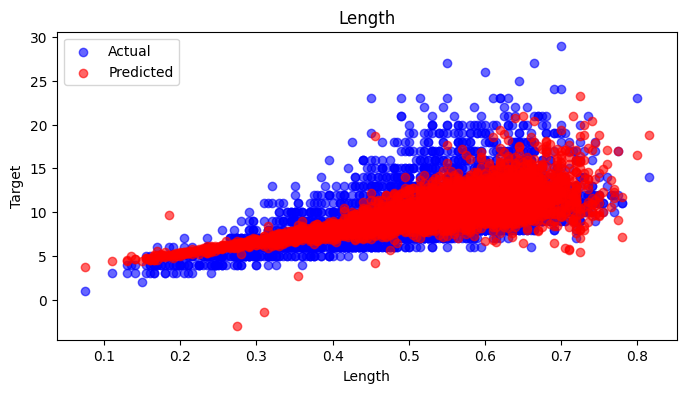

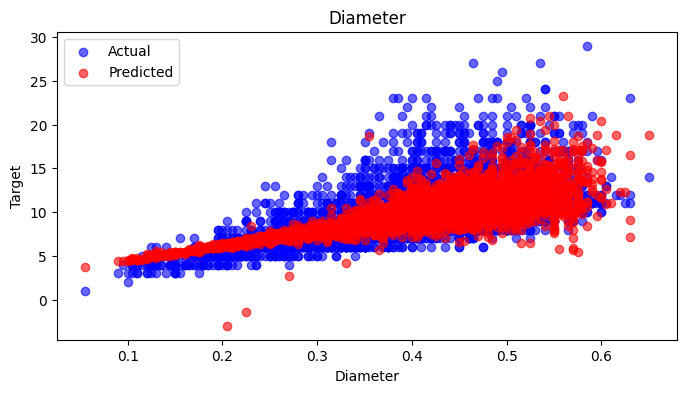

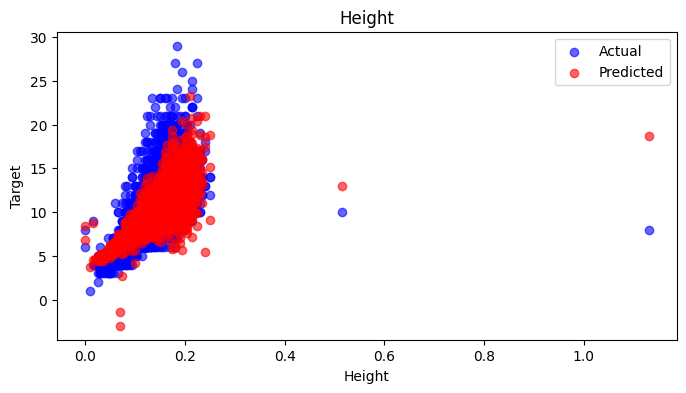

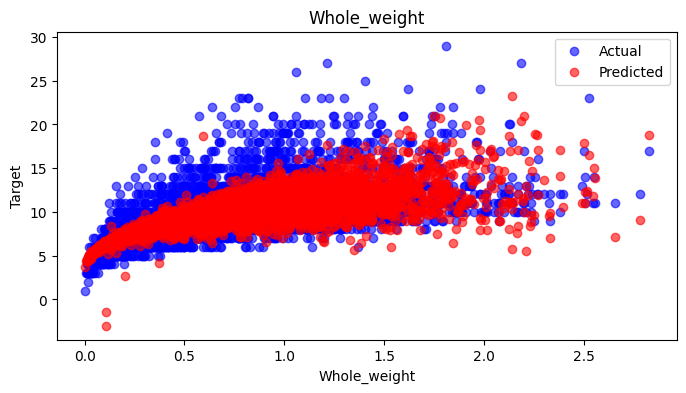

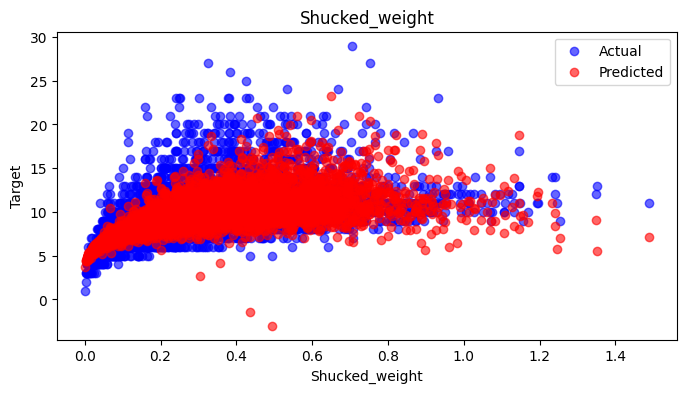

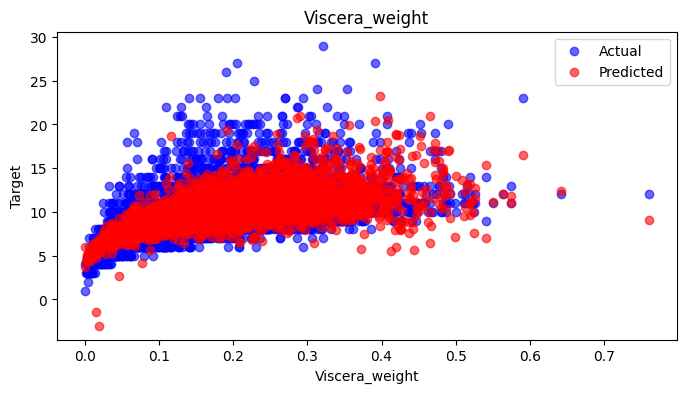

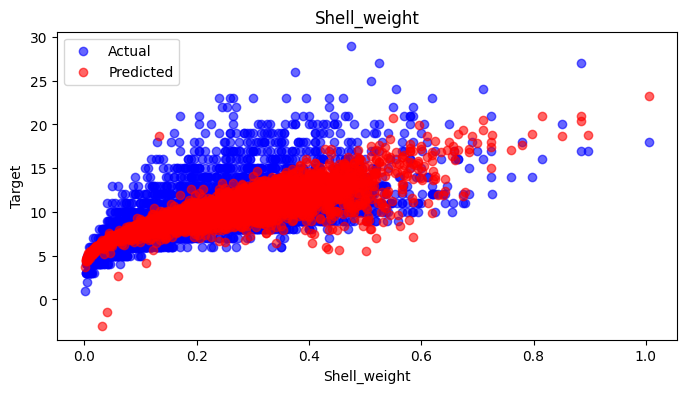

In [ ]:
# Тренировочная и тестовая выборка
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Линейная регрессия
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lin = model.predict(X_test)

# Построение графиков линейной регрессии для каждого признака по отдельности
for i, col in enumerate(X_numeric.columns):
    plt.figure(figsize=(8, 4))
    plt.scatter(X_numeric[col], y, color='blue', label='Actual', alpha=0.6)
    plt.scatter(X_numeric[col], model.predict(X_numeric), color='red', label='Predicted', alpha=0.6)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Target')
    plt.legend()
    plt.show()

## Задание 2

### **Градиентный бустинг** - это метод машинного обучения, который создает модель путем комбинирования прогнозов множества более простых моделей. В основе его лежит идея улучшения модели путем последовательного добавления к ней новых "слабых" моделей (обычно деревьев решений), каждая из которых стремится компенсировать недостатки комбинации, уже существующей в текущей модели.


In [ ]:
# Градиентный бустинг
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train.squeeze())
y_pred_gb = model.predict(X_test)

# Оценка производительности
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_gb = mean_squared_error(y_test, y_pred_gb)

print(f'{mse_lin} - линейная регрессия')
print(f'{mse_gb} - градиентный бустинг')

5.055541144299383 - линейная регрессия
5.227944746851982 - градиентный бустинг


#### Визуализация результатов Линейной регрессии и Градиентого бустинга

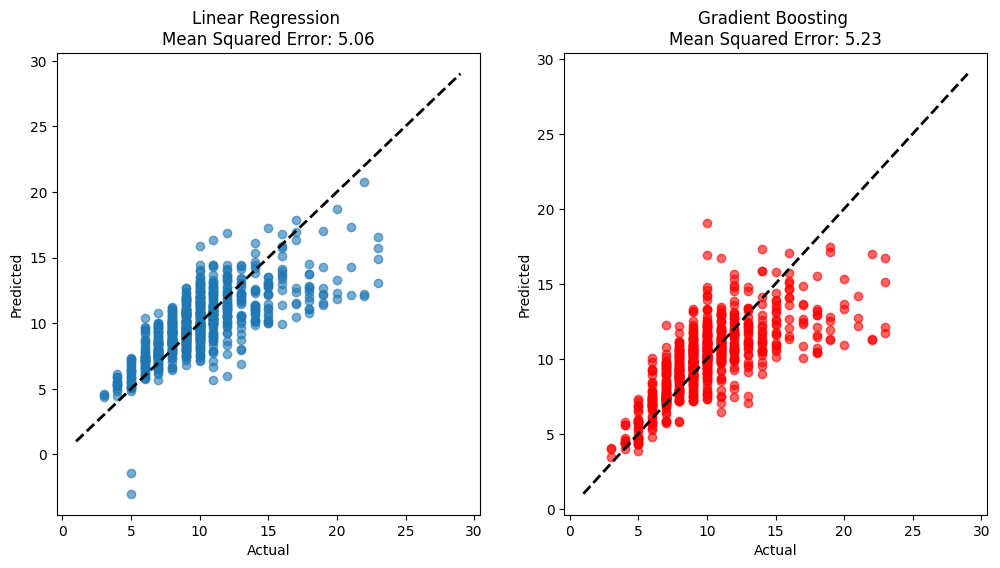

In [ ]:
# Визуализация
plt.figure(figsize=(12, 6))

# Линейная регрессия
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Linear Regression \nMean Squared Error: {:.2f}'.format(mse_lin))
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Градиентный бустинг
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gb, alpha=0.6, color='r')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Gradient Boosting \nMean Squared Error: {:.2f}'.format(mse_gb))
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

## Задание 3

In [ ]:
# Загрузка данных
df = sns.load_dataset('titanic')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Удаление строк с пропущенными значениями для упрощения примера
df = df.dropna().reset_index(drop=True)

# Отделение целевой переменной
X = df.drop('survived', axis=1)
y = df['survived']

# Выбор только категориальных переменных
X_categorical = X.select_dtypes(include=['object', 'category'])
X_categorical.head()

,sex,embarked,class,who,deck,embark_town,alive
0,female,C,First,woman,C,Cherbourg,yes
1,female,S,First,woman,C,Southampton,yes
2,male,S,First,man,E,Southampton,no
3,female,S,Third,child,G,Southampton,yes
4,female,S,First,woman,C,Southampton,yes


### **Логистическая регрессия** — это статистическая модель, используемая для анализа данных, в которых есть одна или несколько независимых переменных, влияющих на результат, являющийся двоичной переменной (например, "да/нет", "успех/неудача", "0/1"). Это один из основных методов, применяемых в машинном обучении для задач классификации.

### Вот ключевые моменты, характеризующие логистическую регрессию:

1. Двоичный Исход: Логистическая регрессия чаще всего используется в ситуациях, где целевая переменная (исход) является двоичной, то есть может принимать только два возможных значения.

2. Оценка Вероятности: В отличие от линейной регрессии, которая предсказывает непрерывное значение, логистическая регрессия предсказывает вероятность принадлежности наблюдения к одному из двух классов. Например, она может оценивать вероятность того, что пациент болен определенным заболеванием.

3. Сигмоидная Функция: В основе модели лежит сигмоидная (логистическая) функция, которая преобразует линейную комбинацию входных признаков в вероятностный диапазон от 0 до 1. Это позволяет модели генерировать нелинейные предсказания.

4. Оценка Риска: Логистическая регрессия часто используется для оценки риска (например, риска возникновения болезни), поскольку ее вывод можно интерпретировать как вероятность.

5. Коэффициенты: Как и в линейной регрессии, коэффициенты в логистической регрессии представляют силу и направление влияния независимых переменных на целевую переменную. Однако из-за логистического преобразования эти коэффициенты интерпретируются по-другому.

6. Применение: Логистическая регрессия широко применяется в медицинских исследованиях, социальных науках, маркетинге и многих других областях.


### **One-Hot Encoding и Target Encoding являются методами кодирования категориальных переменных, широко используемыми в обработке данных и машинном обучении.**

**One-Hot Encoding**
One-Hot Encoding — это процесс преобразования категориальных переменных в форму, которая может быть легче использована алгоритмами машинного обучения. В One-Hot Encoding каждая категория переменной преобразуется в новый столбец, где: 1 указывает на присутствие категории в данном наблюдении, 0 указывает на отсутствие.

**Target Encoding**
Target Encoding — это метод, при котором категориальные значения заменяются числом, основанным на среднем значении целевой переменной для данной категории. Например, в задаче бинарной классификации значение для каждой категории может быть средним значением целевой переменной (0 или 1) для этой категории.

In [ ]:
# Применение One-Hot Encoding
X_one_hot = pd.get_dummies(X_categorical)

# Разделение на тренировочные и тестовые данные для One-Hot
X_train_oh, X_test_oh, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.2, random_state=42)

# Обучение модели на данных с One-Hot Encoding
model_oh = LogisticRegression()
model_oh.fit(X_train_oh, y_train)
y_pred_oh = model_oh.predict(X_test_oh)
accuracy_oh = accuracy_score(y_test, y_pred_oh)

# Применение Target Encoding
encoder = ce.TargetEncoder(cols=X_categorical.columns)
X_target_enc = encoder.fit_transform(X_categorical, y)

# Разделение на тренировочные и тестовые данные для Target Encoding
X_train_te, X_test_te, y_train, y_test = train_test_split(X_target_enc, y, test_size=0.2, random_state=42)

# Обучение модели на данных с Target Encoding
model_te = LogisticRegression()
model_te.fit(X_train_te, y_train)
y_pred_te = model_te.predict(X_test_te)
accuracy_te = accuracy_score(y_test, y_pred_te)

print(f'Accuracy with One-Hot Encoding: {accuracy_oh}')
print(f'Accuracy with Target Encoding: {accuracy_te}')

Accuracy with One-Hot Encoding: 1.0
Accuracy with Target Encoding: 1.0


PCA, или принципиальный компонентный анализ (Principal Component Analysis), — это статистический метод, используемый в анализе данных для уменьшения размерности пространства признаков, сохраняя при этом как можно больше информации. Этот метод часто используется для упрощения данных, визуализации сложных наборов данных и в предобработке данных перед применением алгоритмов машинного обучения.

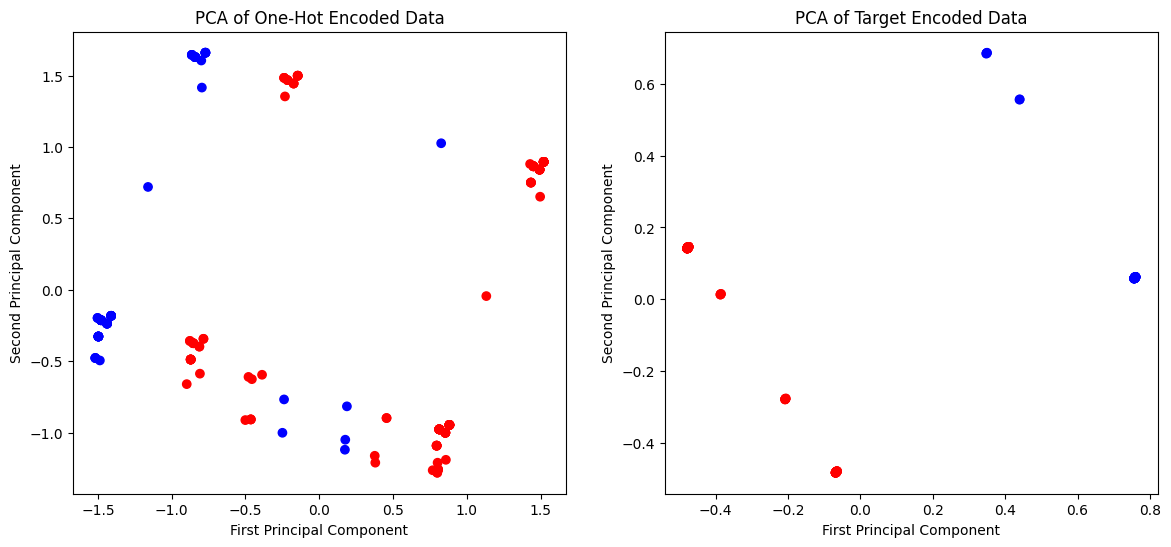

In [ ]:
# Применение PCA к данным с One-Hot Encoding
pca_oh = PCA(n_components=2)
X_pca_oh = pca_oh.fit_transform(X_one_hot)

# Применение PCA к данным с Target Encoding
pca_te = PCA(n_components=2)
X_pca_te = pca_te.fit_transform(X_target_enc)

# Визуализация PCA для One-Hot Encoding
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca_oh[:, 0], X_pca_oh[:, 1], c=np.where(y == 0, 'blue', 'red'))
plt.title('PCA of One-Hot Encoded Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Визуализация PCA для Target Encoding
plt.subplot(1, 2, 2)
plt.scatter(X_pca_te[:, 0], X_pca_te[:, 1], c=np.where(y == 0, 'blue', 'red'))
plt.title('PCA of Target Encoded Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.show()